In [23]:
from os import listdir
from os.path import isfile, join

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

root_dir ="../test/"
log_dir = ""


In [38]:
def draw_plt(tcu, start_up_delay, scenario, path, test_dir):    
    base = pd.read_table(path, sep=" ", names=["time_ymd", "time_hms", "requests", "pods"])
    base["time"] = np.arange(start=0, stop=len(base.index) * 5, step=5)
    # base.head()

    df = base.loc[:, ["requests", "pods", "time"]]
    # df.head()

    ax1 = df.plot(kind="line", drawstyle = "steps-pre", x = 'time', y = 'pods', linestyle = '--', figsize=(15,5)) 
    ax2 = df.plot(kind="line", drawstyle = "steps-pre", x = 'time',  y = 'requests', ax=ax1, secondary_y=True, figsize=(15,5)) 

    title = "Scenario#" + scenario + "(TCU:" + tcu + ", Start Delay: " + start_up_delay + ")"
    ax1.set_title(title)
    ax1.set_xticks(np.arange(0, 660, 20))
    ax1.set_yticks(np.arange(0, 20, 1))
    ax2.set_yticks(np.arange(0, 400, 20))
    plt.savefig(log_dir + "/" + test_dir + "/Scenario#" + scenario + "_" + tcu + "_" + start_up_delay + ".png")
#     plt.show()


/Users/leejaehong/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


FileNotFoundError: [Errno 2] No such file or directory: 'log_kubelet_freq_4/20231007141940_20_20/Scenario#3_60_1.png'

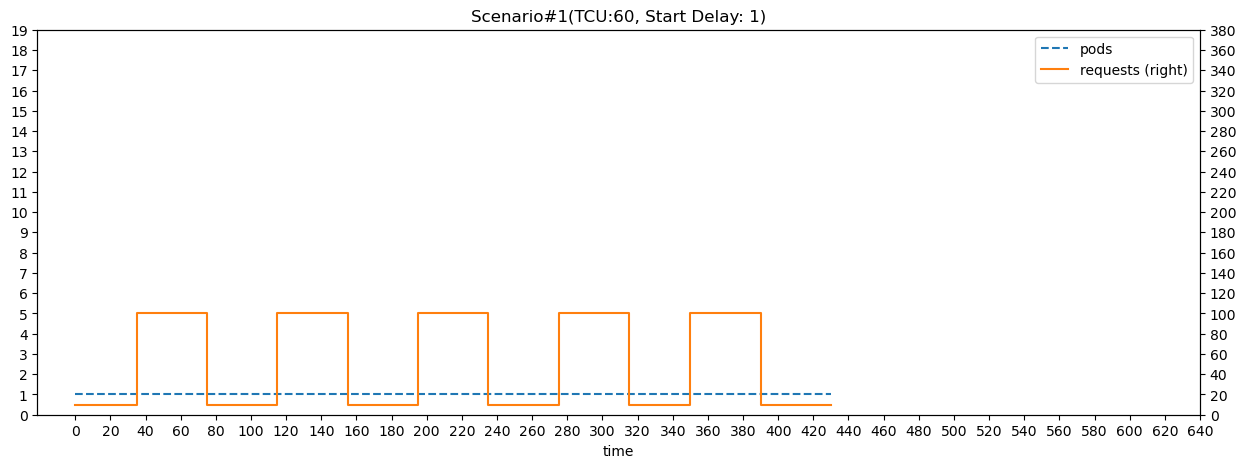

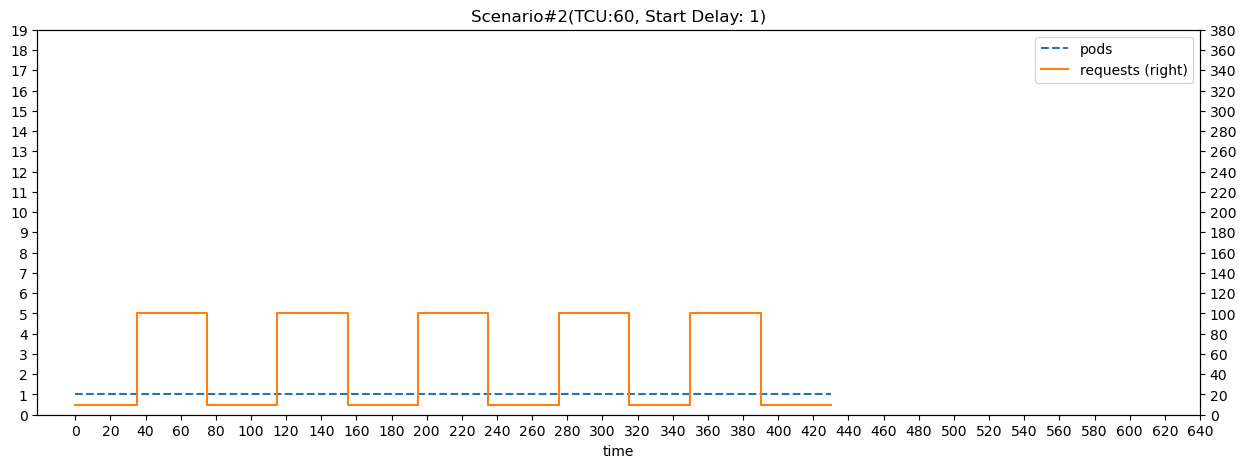

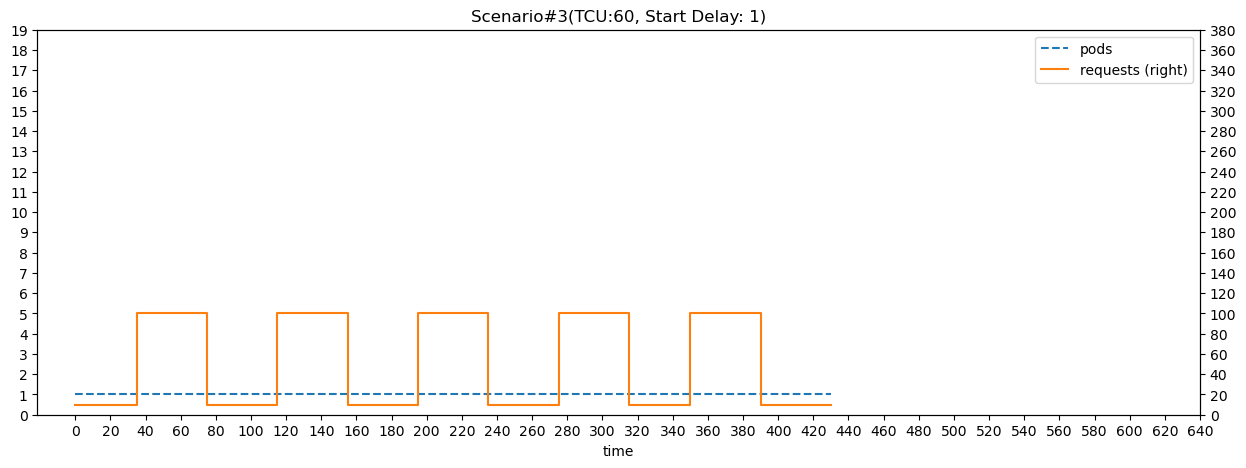

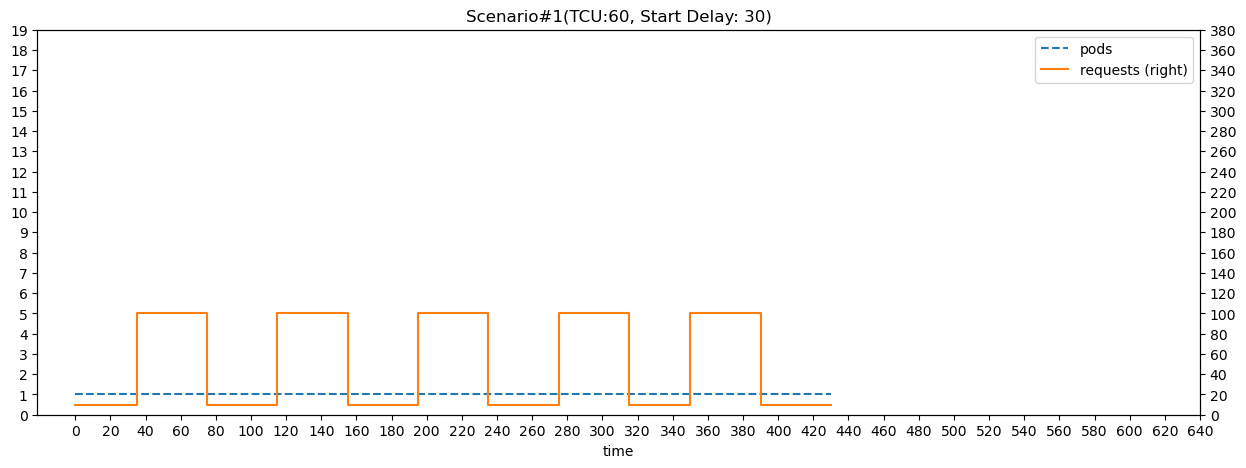

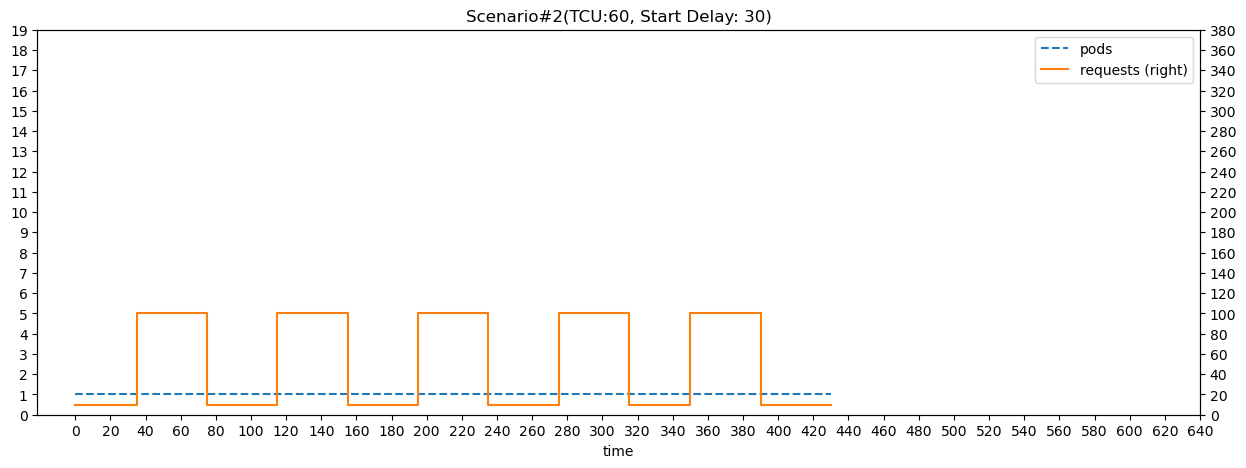

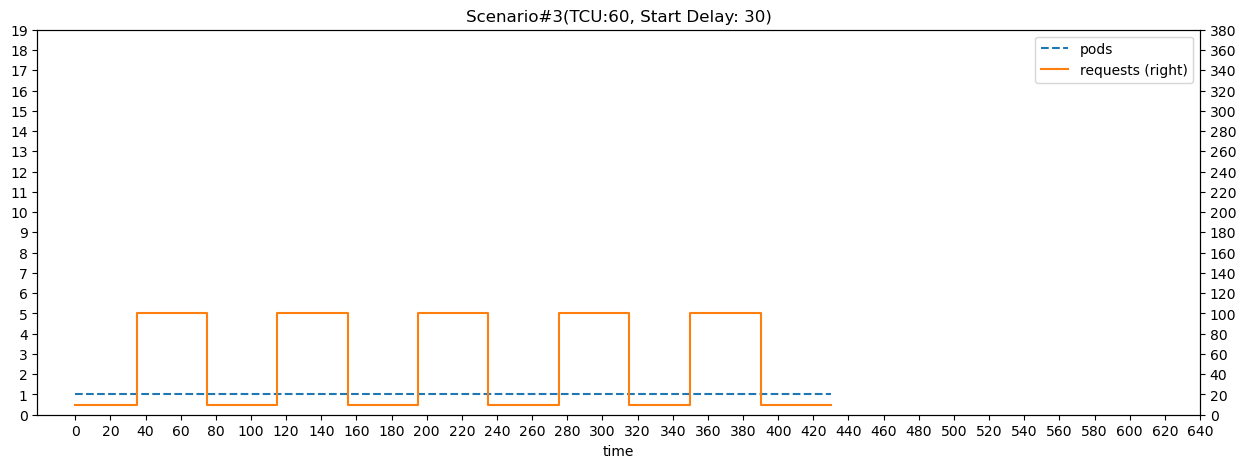

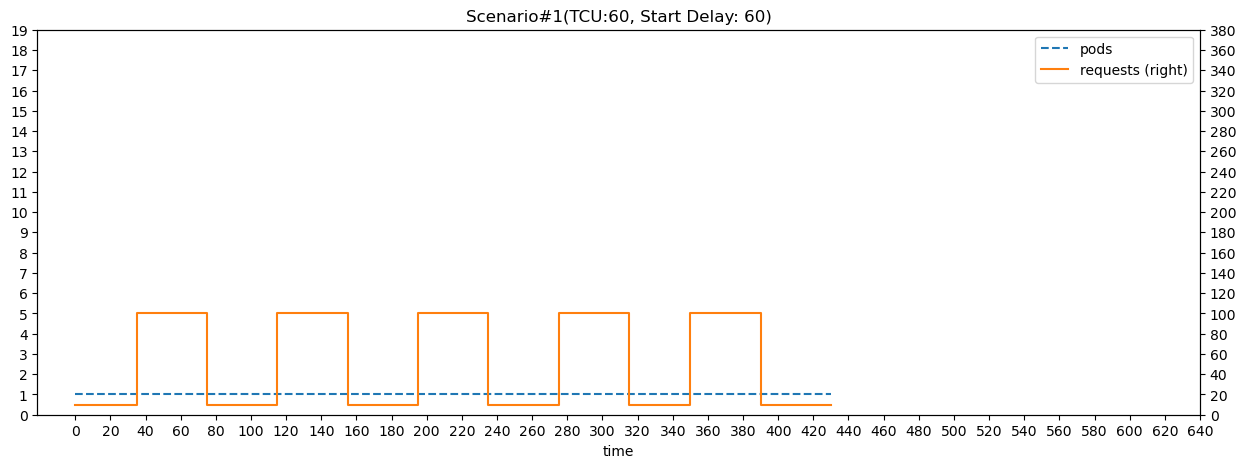

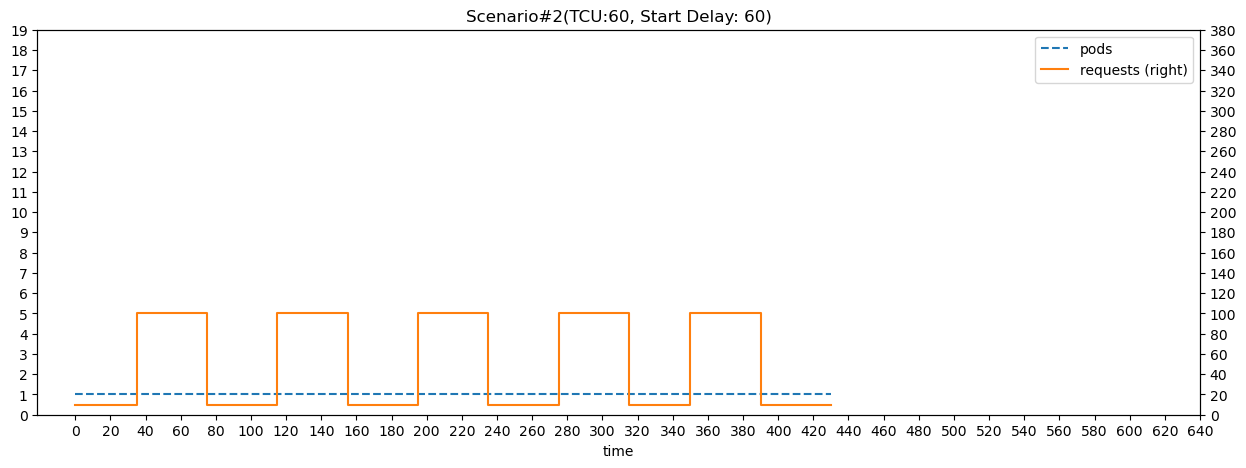

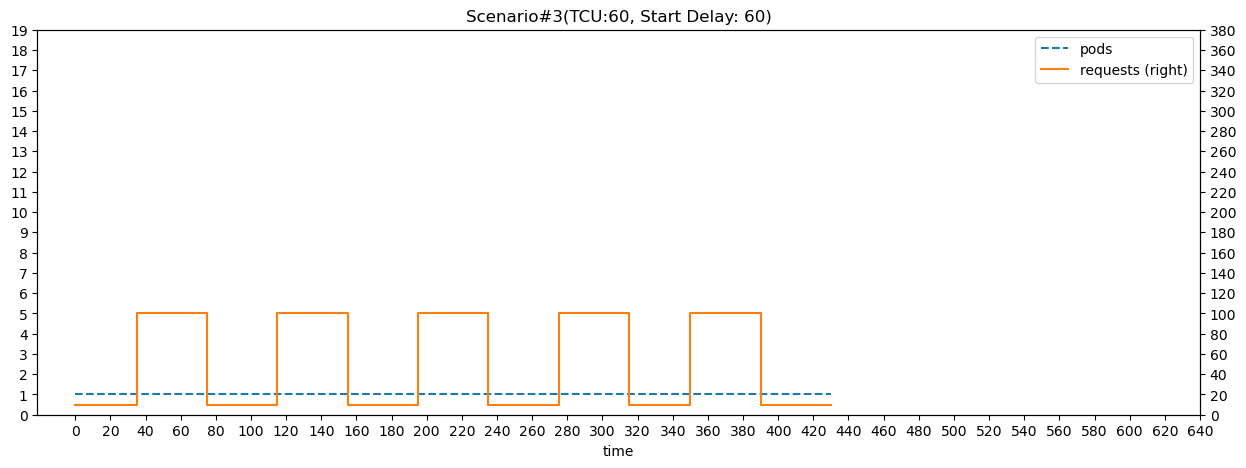

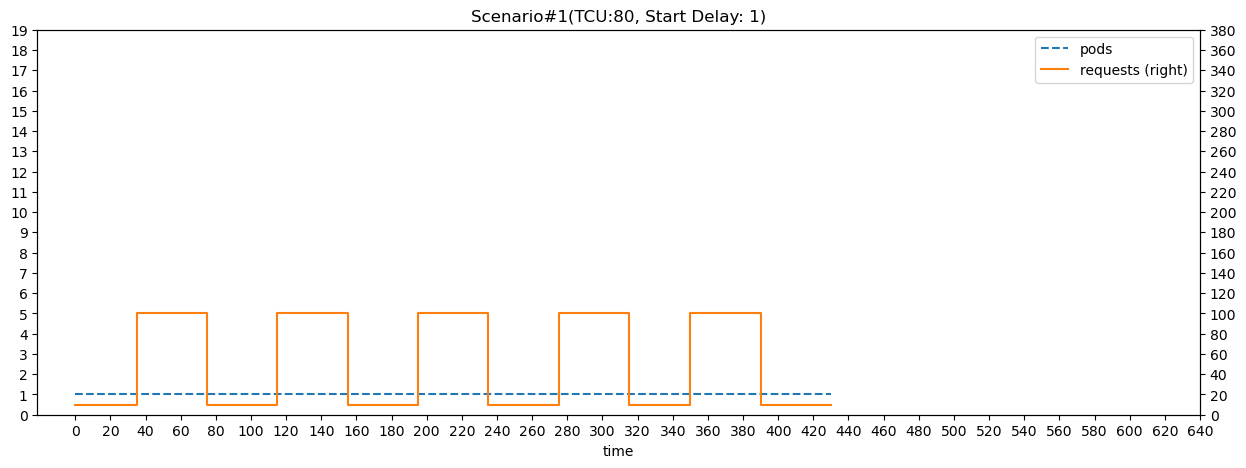

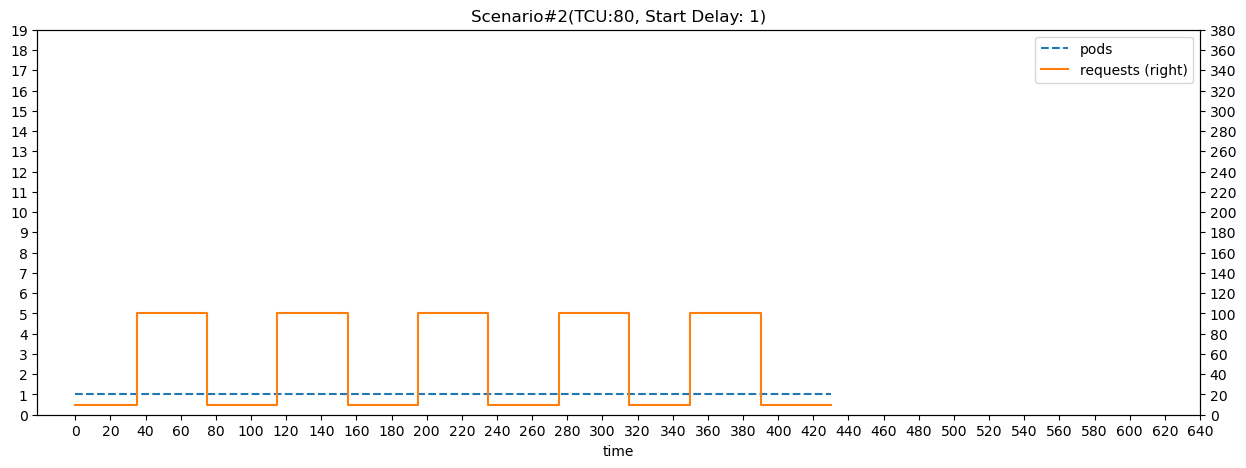

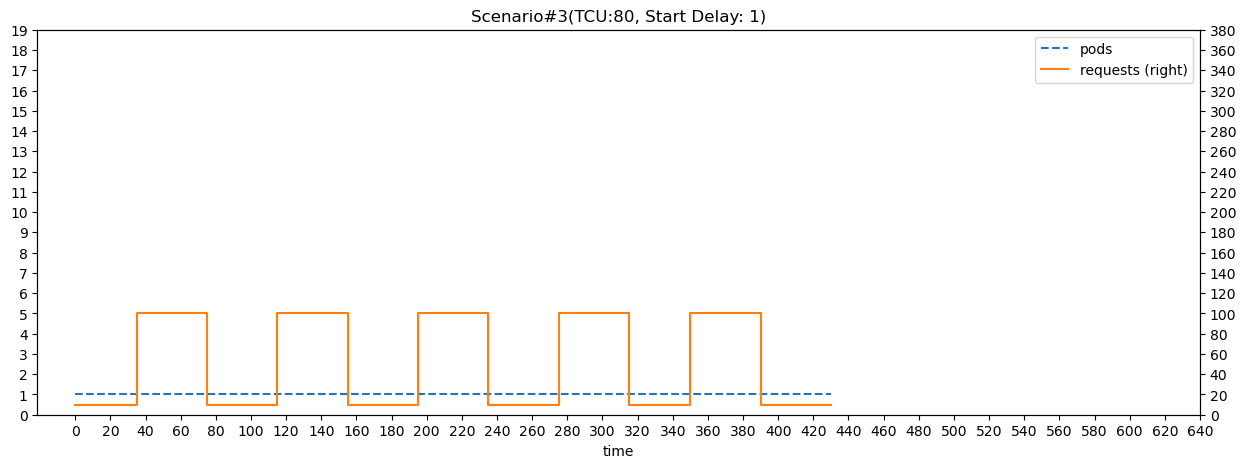

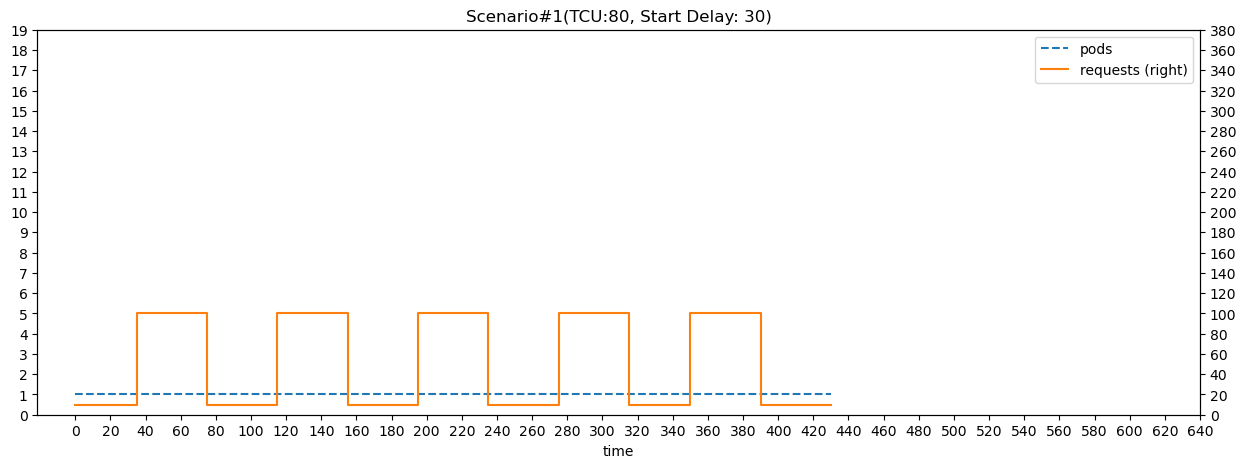

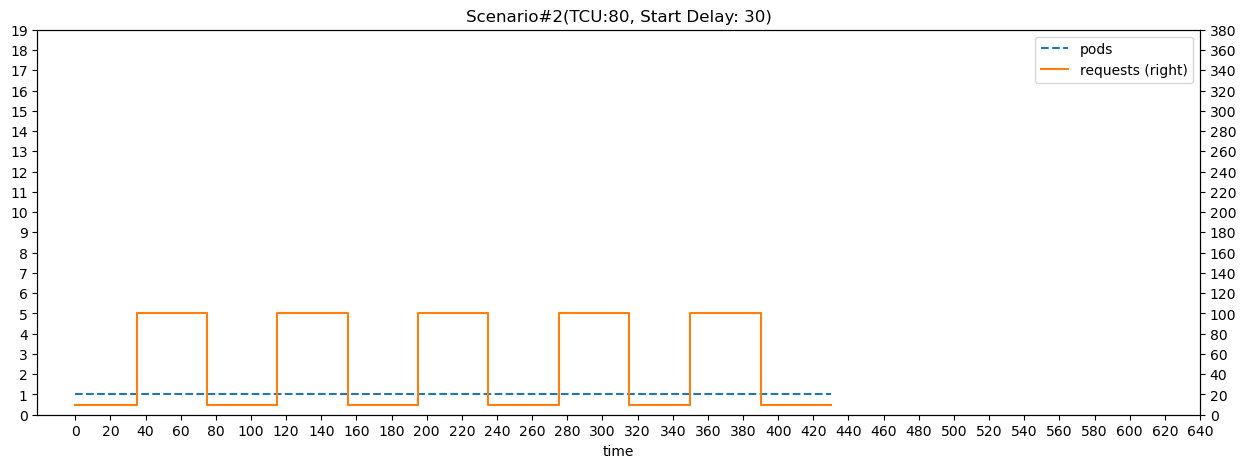

In [ ]:
tcus = ["60", "80"]
start_up_delays = ["1", "30", "60"]
scenarios = ["1", "2", "3"]

import time
#"../test/80_1_scenario#1.txt"
log_dir = "log_kubelet_freq_4"
os.system("mkdir " + log_dir)
test_dir_list = [f for f in listdir(root_dir + log_dir) if os.path.isdir(os.path.join(root_dir + log_dir, f))]
for test_dir in test_dir_list:
    path = root_dir + log_dir + "/" + test_dir + "/" + str(tcu) + "_" + str(start_up_delay) + "_scenario#" + scenario + ".txt"
    os.system("mkdir " + log_dir + "/" + test_dir)

    for tcu in tcus:
        for start_up_delay in start_up_delays:
            for scenario in scenarios:
                draw_plt(tcu, start_up_delay, scenario, path, test_dir)
                time.sleep(1)
